In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
%run C:\Users\csia7\OneDrive\문서\GitHub\Crypto101\Crypto_mods.ipynb

# Extract Crytocurrency Data

In [16]:
data = extract_crypto(start_date = '2012-01-01', end_date = '2024-02-23', cryptos = ['BTC-USD'])
data

[*********************100%%**********************]  1 of 1 completed

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-02-18,51661.968750,52356.964844,51233.707031,52122.546875,52122.546875,17595377311
2024-02-19,52134.812500,52483.324219,51711.820312,51779.144531,51779.144531,21362184346
2024-02-20,51777.726562,52945.050781,50792.312500,52284.875000,52284.875000,33353758256


In [38]:
data.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [9]:
adj_close=data['Adj Close']

bitcoin_prices = adj_close['BTC-USD']
print(bitcoin_prices.head())
ethereum_prices = adj_close['ETH-USD']
print(ethereum_prices.head())

Date
2018-02-01    9170.540039
2018-02-02    8830.750000
2018-02-03    9174.910156
2018-02-04    8277.009766
2018-02-05    6955.270020
Name: BTC-USD, dtype: float64
Date
2018-02-01    1036.790039
2018-02-02     915.784973
2018-02-03     964.018982
2018-02-04     834.682007
2018-02-05     697.950989
Name: ETH-USD, dtype: float64


In [10]:
len(adj_close.index)

2213

# Adjusted Closing Price

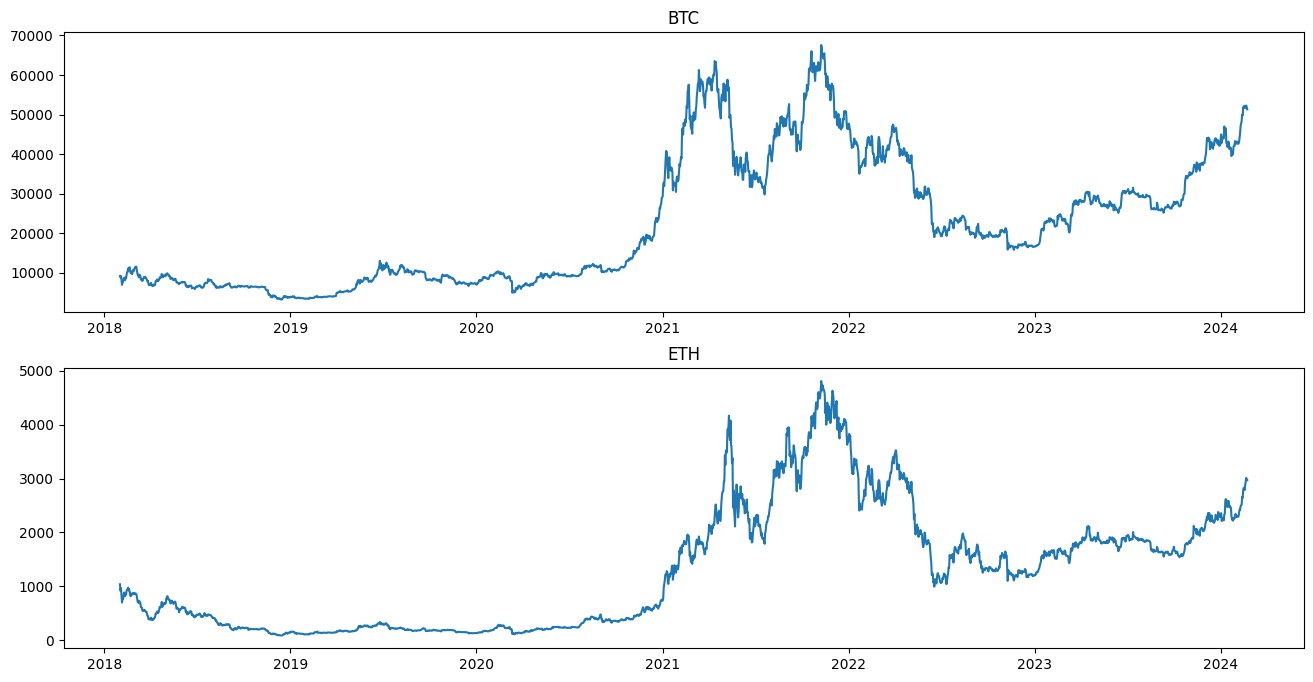

In [11]:
fig, axs =plt.subplots(2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0].plot(adj_close['BTC-USD'])
axs[0].set_title('BTC')
axs[1].plot(adj_close['ETH-USD'])
axs[1].set_title('ETH')
plt.show()

# Moving Average

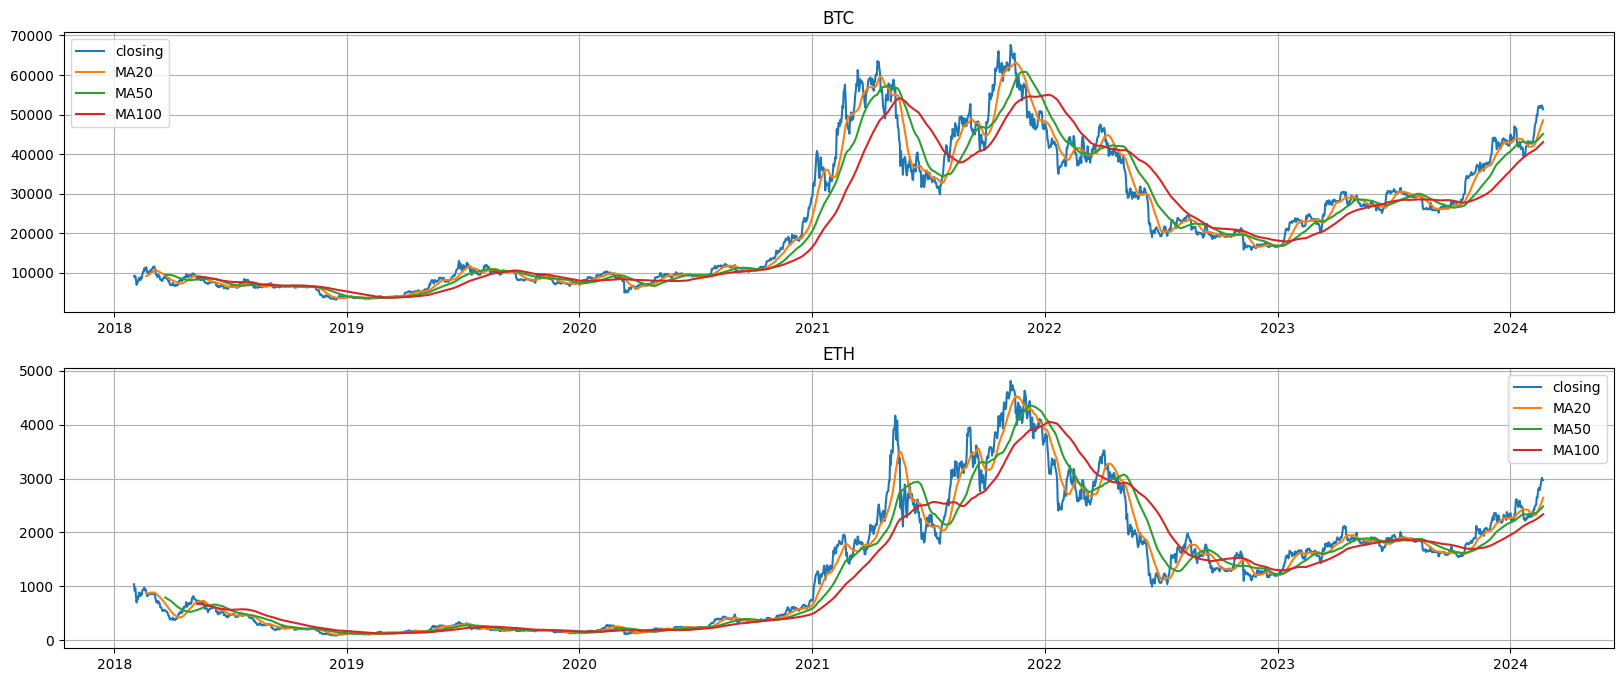

In [12]:
MA20 = adj_close.rolling(20).mean()
MA50 = adj_close.rolling(50).mean()
MA100 = adj_close.rolling(100).mean()

fig, axs = plt.subplots(2,figsize=(20,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0].plot(adj_close['BTC-USD'], label= 'closing')
axs[0].plot(MA20['BTC-USD'], label= 'MA20')
axs[0].plot(MA50['BTC-USD'], label= 'MA50')
axs[0].plot(MA100['BTC-USD'], label= 'MA100')
axs[0].set_title('BTC')
axs[0].legend()
axs[0].grid(True)
axs[1].plot(adj_close['ETH-USD'], label= 'closing')
axs[1].plot(MA20['ETH-USD'], label= 'MA20')
axs[1].plot(MA50['ETH-USD'], label= 'MA50')
axs[1].plot(MA100['ETH-USD'], label= 'MA100')
axs[1].set_title('ETH')
axs[1].legend()
plt.grid(True)
plt.show()

# Golden/Death Cross

In [13]:
SMA50 = adj_close.rolling(window = 50, min_periods = 1).mean()
SMA200 = adj_close.rolling(window = 200, min_periods = 1).mean()

In [14]:
btc_crossings_50_200 = np.where(np.logical_xor(SMA50['BTC-USD'] > SMA200['BTC-USD'], SMA50['BTC-USD'].shift(1) > SMA200['BTC-USD'].shift(1)))[0]
eth_crossings_50_200 = np.where(np.logical_xor(SMA50['ETH-USD'] > SMA200['ETH-USD'], SMA50['ETH-USD'].shift(1) > SMA200['ETH-USD'].shift(1)))[0]

btc_buying_50_200 = np.where((SMA50['BTC-USD'] > SMA200['BTC-USD']) & (SMA50['BTC-USD'].shift(1) <= SMA200['BTC-USD'].shift(1)))[0]
btc_selling_50_200 = np.where((SMA50['BTC-USD'] <= SMA200['BTC-USD']) & (SMA50['BTC-USD'].shift(1) > SMA200['BTC-USD'].shift(1)))[0]

eth_buying_50_200 = np.where((SMA50['ETH-USD'] > SMA200['ETH-USD']) & (SMA50['ETH-USD'].shift(1) <= SMA200['ETH-USD'].shift(1)))[0]
eth_selling_50_200 = np.where((SMA50['ETH-USD'] <= SMA200['ETH-USD']) & (SMA50['ETH-USD'].shift(1) > SMA200['ETH-USD'].shift(1)))[0]


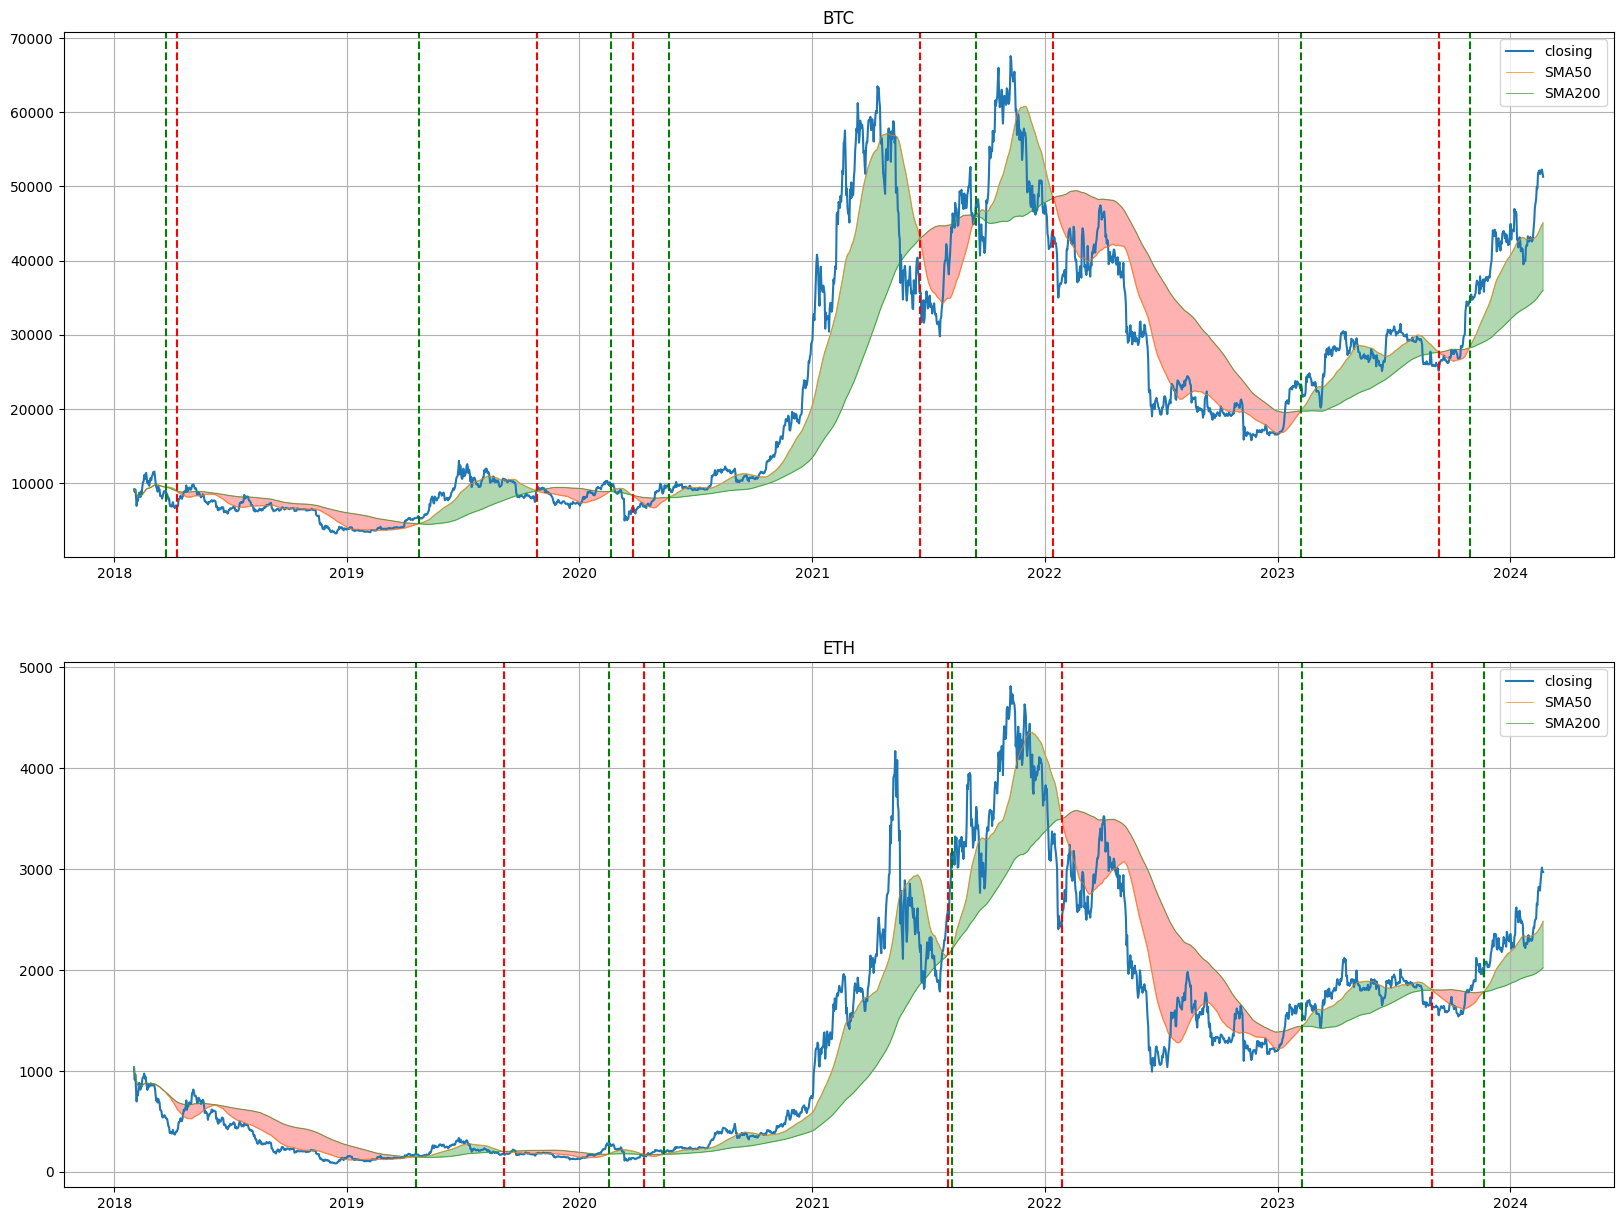

In [15]:
fig, axs = plt.subplots(2,figsize=(20,15),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0].plot(adj_close['BTC-USD'], label= 'closing')
axs[0].plot(SMA50['BTC-USD'], label= 'SMA50', linewidth = 0.5)
axs[0].plot(SMA200['BTC-USD'], label= 'SMA200', linewidth = 0.5)
axs[0].set_title('BTC')
axs[0].legend()
axs[0].grid(True)
axs[0].fill_between(adj_close.index, SMA50['BTC-USD'], SMA200['BTC-USD'], where=(SMA50['BTC-USD'] > SMA200['BTC-USD']), color='green', alpha=0.3)
axs[0].fill_between(adj_close.index, SMA50['BTC-USD'], SMA200['BTC-USD'], where=(SMA50['BTC-USD'] <= SMA200['BTC-USD']), color='red', alpha=0.3)

for buying in btc_buying_50_200:
    axs[0].axvline(x=SMA50.index[buying], color='g', linestyle='--')

for selling in btc_selling_50_200:
    axs[0].axvline(x=SMA50.index[selling], color='r', linestyle='--')
    
axs[1].plot(adj_close['ETH-USD'], label= 'closing')
axs[1].plot(SMA50['ETH-USD'], label= 'SMA50', linewidth = 0.5)
axs[1].plot(SMA200['ETH-USD'], label= 'SMA200', linewidth = 0.5)
axs[1].set_title('ETH')
axs[1].legend()
axs[1].grid(True)
axs[1].fill_between(adj_close.index, SMA50['ETH-USD'], SMA200['ETH-USD'], where=(SMA50['ETH-USD'] > SMA200['ETH-USD']), color='green', alpha=0.3)
axs[1].fill_between(adj_close.index, SMA50['ETH-USD'], SMA200['ETH-USD'], where=(SMA50['ETH-USD'] <= SMA200['ETH-USD']), color='red', alpha=0.3)

for buying in eth_buying_50_200:
    axs[1].axvline(x=SMA50.index[buying], color='g', linestyle='--')

for selling in eth_selling_50_200:
    axs[1].axvline(x=SMA50.index[selling], color='r', linestyle='--')
    
plt.show()

In [305]:
print(btc_buying_50_200, btc_selling_50_200)

[  50  447  748  840 1322 1832 2097] [  68  632  783 1234 1443 2049]


In [306]:
btc_selling_50_200 = btc_selling_50_200.tolist()
btc_buying_50_200 = btc_buying_50_200.tolist()

In [307]:
btc_selling_50_200.append(-1)

In [308]:
def profit_calc(buying, selling, slope_btc):
    seed = 1000000
    past_seed = seed
    btc = 0
    coins = 0
    buy_price = 0
    sell_price = 0
    short_start_price = 0
    short_end_price = 0
    
    for i in range(len(buying)):
        
        buy_price = slope_btc.iloc[buying[i]]['BTC-USD']
        coins = seed/buy_price
        btc += coins
        seed -= buy_price*coins
        
        print('buying at ', buying[i], buy_price, '. current seed: ', seed, ', current btc: ', btc)
        
        sell_price = slope_btc.iloc[selling[i]]['BTC-USD']
        seed += sell_price*btc
        btc = 0
        
        print('selling at ', selling[i], sell_price, '. current seed: ', seed, ', current btc: ', btc)
        print('profit: ', ((seed - past_seed)/1000000)*100)
        past_seed = seed
        
        if (i != len(buying)-1):
            short_start_price = slope_btc.iloc[selling[i]]['BTC-USD']
            coins = 1000000/short_start_price
            btc -= coins
            seed += 1000000
            
            print('shorting start at ', selling[i], short_start_price, '. current seed: ', seed, ', current btc: ', btc)
            
            short_end_price = slope_btc.iloc[buying[i+1]]['BTC-USD']
            seed -= short_end_price*abs(btc)
            btc = 0
            
            print('shorting end at ', buying[i+1], short_end_price, '. current seed: ', seed, ', current btc: ', btc)
            print('profit: ', ((seed - past_seed)/1000000)*100)
        past_seed = seed
        
    return ((seed-1000000)/1000000) *100

In [309]:
profit_calc(btc_buying_50_200, btc_selling_50_200, adj_close)

buying at  50 8879.6201171875 . current seed:  0.0 , current btc:  112.6174303407854
selling at  68 6834.759765625 . current seed:  769713.0818012762 , current btc:  0
profit:  -23.028691819872382
shorting start at  68 6834.759765625 . current seed:  1769713.0818012762 , current btc:  -146.3109215673443
shorting end at  447 5464.86669921875 . current seed:  970143.3987958899 , current btc:  0
profit:  20.043031699461373
buying at  447 5464.86669921875 . current seed:  0.0 , current btc:  177.52370774836655
selling at  632 9244.97265625 . current seed:  1641201.823969765 , current btc:  0
profit:  67.10584251738752
shorting start at  632 9244.97265625 . current seed:  2641201.823969765 , current btc:  -108.16689645090047
shorting end at  748 9633.38671875 . current seed:  1599188.2802912542 , current btc:  0
profit:  -4.201354367851094
buying at  748 9633.38671875 . current seed:  0.0 , current btc:  166.00478388131813
selling at  783 6681.06298828125 . current seed:  1109088.4174671024

308.34358802467324

In [310]:
adj_close.iloc[1461]

BTC-USD    38743.273438
ETH-USD     2792.117188
Name: 2022-02-01 00:00:00, dtype: float64

In [311]:
mod_btc_selling_50_200 = btc_selling_50_200.copy()
mod_btc_buying_50_200 = btc_buying_50_200.copy()

In [312]:
print(mod_btc_buying_50_200, mod_btc_selling_50_200)

[50, 447, 748, 840, 1322, 1832, 2097] [68, 632, 783, 1234, 1443, 2049, -1]


In [313]:
mod_btc_selling_50_200.insert(-3, 1461)
mod_btc_selling_50_200 = mod_btc_selling_50_200[-3:]

mod_btc_buying_50_200 = mod_btc_buying_50_200[-2:]

In [314]:
print(mod_btc_buying_50_200, mod_btc_selling_50_200)

[1832, 2097] [1443, 2049, -1]


In [381]:
def profit_calc_new(buying, selling, slope_btc):
    seed = 1000000
    past_seed = seed
    btc = 0
    coins = 0
    buy_price = 0
    sell_price = 0
    short_start_price = 0
    short_end_price = 0
    
    for i in range(len(buying)):
        
        short_start_price = slope_btc.iloc[selling[i]]['BTC-USD']
        coins = 1000000/short_start_price
        btc -= coins
        seed += 1000000
            
        print('shorting start at ', selling[i], short_start_price, '. current seed: ', seed, ', current btc: ', btc)
            
        short_end_price = slope_btc.iloc[buying[i]]['BTC-USD']
        seed -= short_end_price*abs(btc)
        btc = 0
            
        print('shorting end at ', buying[i], short_end_price, '. current seed: ', seed, ', current btc: ', btc)
        print('profit: ', ((seed - past_seed)/1000000)*100)
        past_seed = seed
        
        buy_price = slope_btc.iloc[buying[i]]['BTC-USD']
        coins = seed/buy_price
        btc += coins
        seed -= buy_price*coins
        
        print('buying at ', buying[i], buy_price, '. current seed: ', seed, ', current btc: ', btc)
        
        sell_price = slope_btc.iloc[selling[i+1]]['BTC-USD']
        seed += sell_price*btc
        btc = 0
        
        print('selling at ', selling[i], sell_price, '. current seed: ', seed, ', current btc: ', btc)
        print('profit: ', ((seed-past_seed)/1000000)*100)
        past_seed = seed
        
    return ((seed-1000000)/1000000) *100

In [316]:
profit_calc_new(mod_btc_buying_50_200, mod_btc_selling_50_200, adj_close)

shorting start at  1443 43099.69921875 . current seed:  2000000 , current btc:  -23.202018068027773
shorting end at  1832 23264.291015625 . current seed:  1460221.4995156126 , current btc:  0
profit:  46.02214995156126
buying at  1832 23264.291015625 . current seed:  0.0 , current btc:  62.76664517886592
selling at  1443 25833.34375 . current seed:  1621472.3209399236 , current btc:  0
profit:  16.1250821424311
shorting start at  2049 25833.34375 . current seed:  2621472.3209399236 , current btc:  -38.70966181062024
shorting end at  2097 34502.36328125 . current seed:  1285897.5066555745 , current btc:  0
profit:  -33.55748142843491
buying at  2097 34502.36328125 . current seed:  0.0 , current btc:  37.26983847956827
selling at  2049 51304.97265625 . current seed:  1912128.0440971043 , current btc:  0
profit:  62.623053744152976


91.21280440971043

# slope momentum

In [383]:
slope_SMA50_btc = (SMA50['BTC-USD'].diff()).rename('Slope_SMA50_BTC')
slope_SMA200_btc = (SMA200['BTC-USD'].diff()).rename('Slope_SMA200_BTC')

#slope_ema12_eth = (EMA12['ETH-USD'].diff() / time_interval).rename('Slope_EMA12_ETH')
#slope_ema26_eth = (EMA26['ETH-USD'].diff() / time_interval).rename('Slope_EMA26_ETH')

slope_diff_btc = slope_SMA50_btc - slope_SMA200_btc
#slope_diff_eth = slope_ema12_eth - slope_ema26_eth

#btc_buying = ((EMA12['BTC-USD'] > EMA26['BTC-USD']) & (EMA12['BTC-USD'].shift(1) <= EMA26['BTC-USD'].shift(1))).astype(int)
#eth_buying = ((EMA12['ETH-USD'] > EMA26['ETH-USD']) & (EMA12['ETH-USD'].shift(1) <= EMA26['ETH-USD'].shift(1))).astype(int)

# Calculate the slope difference before and after each buying point
#slope_diff_change_btc = slope_diff_btc.groupby(btc_buying.cumsum()).diff()
#slope_diff_change_eth = slope_diff_eth.groupby(eth_buying.cumsum()).diff()

#slope_diff_change_df = pd.concat([slope_diff_change_btc.rename('Slope_Diff_BTC'), slope_diff_change_eth.rename('Slope_Diff_ETH')], axis=1)

print(slope_diff_btc)


Date
2018-02-01          NaN
2018-02-02     0.000000
2018-02-03     0.000000
2018-02-04     0.000000
2018-02-05     0.000000
                ...    
2024-02-18    84.459951
2024-02-19    77.276816
2024-02-20    46.296943
2024-02-21    23.638955
2024-02-22    57.820352
Length: 2213, dtype: float64


In [421]:
slope_price = pd.concat([slope_diff_btc, adj_close['BTC-USD']], axis = 1)
slope_price

,0,BTC-USD
Date,,
2018-02-01,NaN,9170.540039
2018-02-02,0.000000,8830.750000
2018-02-03,0.000000,9174.910156
2018-02-04,0.000000,8277.009766
2018-02-05,0.000000,6955.270020
...,...,...
2024-02-18,84.459951,52122.546875
2024-02-19,77.276816,51779.144531
2024-02-20,46.296943,52284.875000


(array([ 24.,  19.,  42.,  46.,  83., 633., 998., 257.,  80.,  30.]),
 array([-629.28358398, -525.15864551, -421.03370703, -316.90876855,
        -212.78383008, -108.6588916 ,   -4.53395313,   99.59098535,
         203.71592383,  307.8408623 ,  411.96580078]),
 <BarContainer object of 10 artists>)

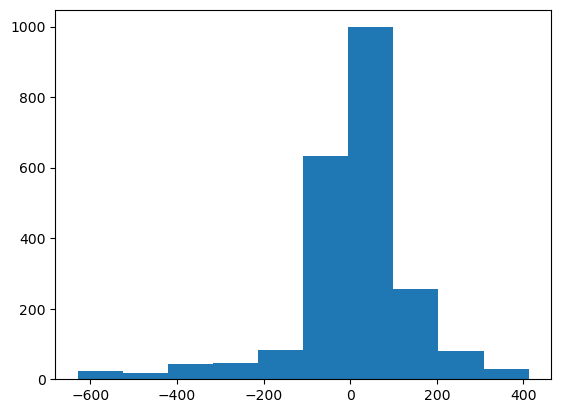

In [423]:
plt.hist(slope_price[0])

In [424]:
slope_price[0][51:].describe()

count    2162.000000
mean        4.201615
std       136.003355
min      -629.283584
25%       -37.042496
50%        12.699526
75%        61.513231
max       411.965801
Name: 0, dtype: float64

# slope threshold indicator

In [437]:
def slope_threshold_profit_calc(slope_price):
    seed = 1000000
    btc = 0
    coins = 0
    buy_price = 0
    sell_price = 0
    short_start_price = 0
    short_end_price = 0
    prev_pos = 0 # indicates the position: 1 is long, -1 is short, 0 is none
    
    for i in range(1461, len(slope_price)):
        
        if(slope_price.iloc[i][0]>100):
            if(prev_pos<0):
                short_end_price = slope_price.iloc[i]['BTC-USD']
                seed -= short_end_price*abs(btc)
                btc = 0
                
                print('shorting end at ', i, ', slope ', slope_price.iloc[i][0],', price ', short_end_price, '. current seed: ', seed, ', current btc: ', btc)
                
            buy_price = slope_price.iloc[i]['BTC-USD']
            coins = 10000/buy_price
            btc += coins
            seed -= 10000
            
            print('buying at ', i, ', slope ', slope_price.iloc[i][0],', price ', buy_price, '. current seed: ', seed, ', current btc: ', btc)
            prev_pos = 1
            
        elif(slope_price.iloc[i][0]<-50):
            if(prev_pos>0):
                sell_price = slope_price.iloc[i]['BTC-USD']
                seed += sell_price*btc
                btc = 0
                
                print('selling at ', i, ', slope ', slope_price.iloc[i][0],', price ', sell_price, '. current seed: ', seed, ', current btc: ', btc)
            
            short_start_price = slope_price.iloc[i]['BTC-USD']
            coins = 10000/short_start_price
            btc -= coins
            seed += 10000
            
            print('shorting start at ', i, ', slope ', slope_price.iloc[i][0],', price ', short_start_price, '. current seed: ', seed, ', current btc: ', btc)
            prev_pos = -1
        
        else:
            if(prev_pos<0):
                short_end_price = slope_price.iloc[i]['BTC-USD']
                seed -= short_end_price*abs(btc)
                btc = 0
                
                print('shorting end at ', i, ', slope ', slope_price.iloc[i][0],', price ', short_end_price, '. current seed: ', seed, ', current btc: ', btc)
                
            elif(prev_pos>0):
                sell_price = slope_price.iloc[i]['BTC-USD']
                seed += sell_price*btc
                btc = 0
                
                print('selling at ', i, ', slope ', slope_price.iloc[i][0],', price ', sell_price, '. current seed: ', seed, ', current btc: ', btc)   
    
    if btc>0:
        sell_price = slope_price.iloc[-1]['BTC-USD']
        seed += sell_price*btc
        btc = 0
        print('selling at ', i, ', slope ', slope_price.iloc[i][0],', price ', sell_price, '. current seed: ', seed, ', current btc: ', btc)
    elif btc<0:
        short_end_price = slope_price.iloc[i]['BTC-USD']
        seed -= short_end_price*abs(btc)
        btc = 0
                
        print('shorting end at ', i, ', slope ', slope_price.iloc[i][0],', price ', short_end_price, '. current seed: ', seed, ', current btc: ', btc)
    
    return ((seed-1000000)/1000000) *100

In [438]:
slope_threshold_profit_calc(slope_price)

shorting start at  1461 , slope  -196.49281250000786 , price  38743.2734375 . current seed:  1010000 , current btc:  -0.25810932099301914
shorting start at  1462 , slope  -220.29254882811802 , price  36952.984375 . current seed:  1020000 , current btc:  -0.5287234586366719
shorting start at  1463 , slope  -261.63137695312616 , price  37154.6015625 . current seed:  1030000 , current btc:  -0.7978691251075771
shorting start at  1464 , slope  -176.7062304687497 , price  41500.875 . current seed:  1040000 , current btc:  -1.0388279000731653
shorting start at  1465 , slope  -153.3886914062532 , price  41441.1640625 . current seed:  1050000 , current btc:  -1.2801338630262902
shorting start at  1466 , slope  -140.23557617187907 , price  42412.43359375 . current seed:  1060000 , current btc:  -1.5159137783168295
shorting start at  1467 , slope  -114.97050781249709 , price  43840.28515625 . current seed:  1070000 , current btc:  -1.7440144844221677
shorting start at  1468 , slope  -107.9211132

-2.5655277234170235

In [375]:
slp_buying = []
slp_selling = []

for i in range(1, len(slope_price)):
    prev_value = slope_price.iloc[i - 1][0]
    curr_value = slope_price.iloc[i][0]
    
    if prev_value > 0 and curr_value <= 0:
        slp_selling.append(i)
    elif prev_value < 0 and curr_value >= 0:
        slp_buying.append(i)

In [376]:
for i in range(47):
    print(slp_buying[i], slp_selling[i])

62 61
87 63
91 88
101 99
124 123
166 126
172 171
191 190
231 220
256 254
267 257
342 288
346 343
532 530
537 536
679 555
705 681
817 766
872 870
880 874
907 881
994 957
1124 1121
1168 1156
1270 1172
1281 1279
1336 1335
1488 1398
1497 1491
1526 1525
1542 1538
1580 1557
1641 1581
1704 1703
1762 1761
1779 1778
1786 1780
1791 1787
1866 1862
1975 1920
1982 1981
1985 1984
1988 1987
2000 1991
2005 2001
2073 2015
2202 2180


In [377]:
slp_buying[27]

1488

In [378]:
slp_buying = slp_buying[27:]
slp_buying

[1488,
 1497,
 1526,
 1542,
 1580,
 1641,
 1704,
 1762,
 1779,
 1786,
 1791,
 1866,
 1975,
 1982,
 1985,
 1988,
 2000,
 2005,
 2073,
 2202]

In [379]:
slp_selling = slp_selling[28:]
slp_selling.insert(0, 1461)
slp_selling.append(-1)
slp_selling

[1461,
 1491,
 1525,
 1538,
 1557,
 1581,
 1703,
 1761,
 1778,
 1780,
 1787,
 1862,
 1920,
 1981,
 1984,
 1987,
 1991,
 2001,
 2015,
 2180,
 -1]

In [380]:
for i in range(len(slp_buying)):
    print(slp_selling[i], slp_buying[i])

1461 1488
1491 1497
1525 1526
1538 1542
1557 1580
1581 1641
1703 1704
1761 1762
1778 1779
1780 1786
1787 1791
1862 1866
1920 1975
1981 1982
1984 1985
1987 1988
1991 2000
2001 2005
2015 2073
2180 2202


In [382]:
profit_calc_new(slp_buying, slp_selling, adj_close)

shorting start at  1461 38743.2734375 . current seed:  2000000 , current btc:  -25.810932099301915
shorting end at  1488 43193.234375 . current seed:  885142.3603976415 , current btc:  0
profit:  -11.485763960235845
buying at  1488 43193.234375 . current seed:  0.0 , current btc:  20.492615873886884
selling at  1461 42451.7890625 . current seed:  869948.2064170851 , current btc:  0
profit:  -1.519415398055641
shorting start at  1491 42451.7890625 . current seed:  1869948.2064170851 , current btc:  -23.556133253365168
shorting end at  1497 41982.92578125 . current seed:  880992.8123478201 , current btc:  0
profit:  1.1044605930735008
buying at  1497 41982.92578125 . current seed:  0.0 , current btc:  20.984550170185624
selling at  1491 43206.73828125 . current seed:  906673.9671529704 , current btc:  0
profit:  2.568115480515023
shorting start at  1525 43206.73828125 . current seed:  1906673.9671529704 , current btc:  -23.144538092428977
shorting end at  1526 43503.84765625 . current se

18.693403185343044